In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pwd

/content


In [2]:
import os
os.chdir('/content/drive/MyDrive/mask_detection_using_deep_learning/data2')

In [3]:
!pwd

/content/drive/MyDrive/mask_detection_using_deep_learning/data2


In [ ]:
# !unzip train

In [4]:
import os
len(os.listdir('test/mask'))

204

In [5]:
import os
os.chdir('/content/drive/MyDrive/mask_detection_using_deep_learning')
!pwd

/content/drive/MyDrive/mask_detection_using_deep_learning


In [5]:
!nvidia-smi

Sun Oct  9 05:26:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
#from keras.applications.vgg16 import VGG16,preprocess_input
#from keras.applications.resnet import ResNet101,preprocess_input
# from keras.applications.resnet_v2 import ResNet101V2,preprocess_input
from keras.applications.mobilenet import MobileNet,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
#from tensorflow.keras.applications import EfficientNetB7

In [ ]:
# resizing images

image_size=[224,224]

train_path='/content/drive/MyDrive/mask_detection_using_deep_learning/data2/train'
valid_path='/content/drive/MyDrive/mask_detection_using_deep_learning/data2/test'

In [ ]:
# adding preprocessing layer in front of VGG

mobilenet=MobileNet(input_shape=image_size+[3],weights='imagenet',include_top=False)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
# d'nt train existing weights

for layer in mobilenet.layers:
  layer.trainable=False

In [ ]:
# finding number of classes

folders=glob('/content/drive/MyDrive/mask_detection_using_deep_learning/data2/train/*')
folders

['/content/drive/MyDrive/mask_detection_using_deep_learning/data2/train/mask',
 '/content/drive/MyDrive/mask_detection_using_deep_learning/data2/train/no_mask']

In [ ]:
x=Flatten()(mobilenet.output)
prediction=Dense(len(folders),activation='sigmoid')(x)

In [ ]:
model=Model(inputs=mobilenet.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
# Compiling the model

model.compile(loss='binary_crossentropy',optimizer='adamax',metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/mask_detection_using_deep_learning/data2/train',target_size=(224,224),batch_size=5,class_mode='categorical')
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/mask_detection_using_deep_learning/data2/test',target_size=(224,224),batch_size=5)

Found 1592 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


In [ ]:
r=model.fit_generator(training_set,validation_data=test_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
319/319 [==============================] - 317s 958ms/step - loss: 0.0829 - accuracy: 0.9805 - val_loss: 0.0341 - val_accuracy: 0.9926
Epoch 2/5
319/319 [==============================] - 24s 74ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0216 - val_accuracy: 0.9951
Epoch 3/5
319/319 [==============================] - 24s 77ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 0.0088 - val_accuracy: 0.9975
Epoch 4/5
319/319 [==============================] - 23s 73ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0228 - val_accuracy: 0.9951
Epoch 5/5
319/319 [==============================] - 23s 73ms/step - loss: 4.7131e-04 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 0.9975


In [ ]:
print(r.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


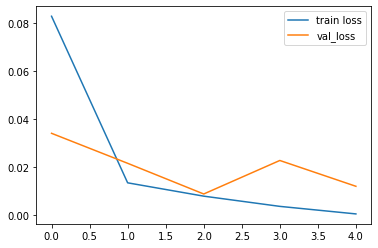

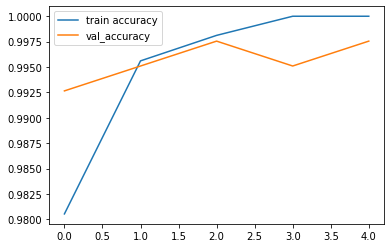

<Figure size 432x288 with 0 Axes>

In [ ]:
# plotting loss and accuracy

## loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


## Accuracies
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from keras.models import load_model

model.save('mobilenet.hdf5')

In [6]:
## model deployment on cloud

!pip install pyngrok
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!ngrok authtoken 2FsrahPLaUxrW5y8A8ug3DsoQyi_691Yh8WqGgHoyrRTYucws

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [8]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [9]:
from pyngrok import ngrok
url = ngrok.connect(port=8501)
url

<NgrokTunnel: "http://8650-35-186-166-212.ngrok.io" -> "http://localhost:80">